# Building the K-mer spectra from a genome

Write functions to:
1. Calculate k-mers from DNA sequences. Check it on a sequence with L=33 using k=21. Seq='ATGGACCAGATATAGGGAGAGCCAGGTAGGACA'  How many kmers do you expect from it?
2. Calculate them directly from a FASTA file (example fastas read.fasta and Theileria provided)
3. Adapt the functions in a python program to plot the k-mer spectra of a fasta file. Apply this to a bacterial genome, Klebsiella pneumoniae:GCF_000240185.1_ASM24018v2_genomic.fasta
4. Optional Assignment (via Moodle): write a .py to do this and the plots you get with k=8

Information: 
--------------
A method of visualizing k-mers, the k-mer spectrum, shows the multiplicity of each k-mer in a sequence versus the number of k-mers with that multiplicity (see  https://en.wikipedia.org/wiki/K-mer). This is a sort of density plot, notation varies a bit the x-axis basically shows multiplicity of each kmer (number of time is repeated in the sequences or genome) and the y-axis the number of kmers at a given multiplicity (e.g. how many kmers appear 1,2,3,...100 times in the genome). For these reasons, the y-axis is sometimes called frequency and the x-axis counts by some programs.

In the case of reads, the multiplicity is "amplified" by the sequencing coverage.


Write functions to:
1. Calculate k-mers from DNA sequences. Check it on a sequence with L=33 using k=21. Seq='ATGGACCAGATATAGGGAGAGCCAGGTAGGACA'  How many kmers do you expect from it?

In [3]:
'''
WE EXPECT len(seq)-k+1 kmers.
    In this case: 33-21+1 = 13
'''

def kmers1(seq, k):
    return [seq[pos:pos+k] for pos in range(len(seq)-k+1)]


Seq='ATGGACCAGATATAGGGAGAGCCAGGTAGGACA'
k = 21

for kmer in kmers1(Seq, k):
    print(kmer)



ATGGACCAGATATAGGGAGAG
TGGACCAGATATAGGGAGAGC
GGACCAGATATAGGGAGAGCC
GACCAGATATAGGGAGAGCCA
ACCAGATATAGGGAGAGCCAG
CCAGATATAGGGAGAGCCAGG
CAGATATAGGGAGAGCCAGGT
AGATATAGGGAGAGCCAGGTA
GATATAGGGAGAGCCAGGTAG
ATATAGGGAGAGCCAGGTAGG
TATAGGGAGAGCCAGGTAGGA
ATAGGGAGAGCCAGGTAGGAC
TAGGGAGAGCCAGGTAGGACA



2. Calculate them directly from a FASTA file (example fastas read.fasta and Theileria provided)


In [ ]:
def kmers_fasta(filename, k):
    fa_file =open(filename, 'r')
    next(fa_file)

    seq = fa_file.read().replace('\n', '')

    fa_file.close()

    return [seq[pos:pos+k] for pos in range(len(seq)-k+1)]

k = 21

# Use function to 'read.fasta'
for kmer in kmers_fasta('read.fasta', k):
   print(kmer)
# Use function to 'Theileria_2500bp.fa'
for kmer in kmers_fasta('Theileria_2500bp.fa', k):
   print(kmer)


3. Adapt the functions in a python program to plot the k-mer spectra of a fasta file. Apply this to a bacterial genome, Klebsiella pneumoniae:GCF_000240185.1_ASM24018v2_genomic.fasta


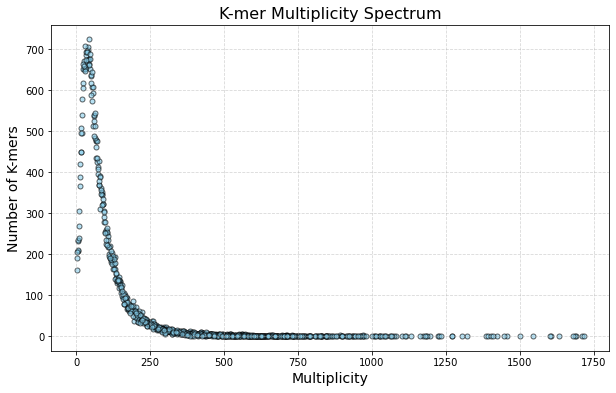

In [136]:
import matplotlib.pyplot as plt
from Bio import SeqIO

def clean_sequence(sequence):
    # Remove lowercase characters and convert 'n' to 'N'
    cleaned_sequence = ''.join(char.upper() if char.upper() in {'A', 'T', 'C', 'G', 'N'} else '' for char in sequence)
    
    return cleaned_sequence

def kmers_spectra(filename, k):
    # Read sequence file using SeqIO
    sequences = []
    with open(filename, 'r') as file:
        for record in SeqIO.parse(file, 'fastq' if 'fastq' in filename.lower() else 'fasta'):
            sequences.append(clean_sequence(record.seq))

    # Combine sequences into a single sequence
    seq = ''.join(sequences)

    # Count k-mers and their frequencies
    freq_d = {}
    for pos in range(len(seq)-k+1):
        kmer = seq[pos:pos+k]
        freq_d[kmer] = freq_d.get(kmer, 0) + 1

    # Count multiplicities
    mult_d = {}
    for freq in freq_d.values():
        mult_d[freq] = mult_d.get(freq, 0) + 1

    plot_spectra(mult_d)
    return 

def plot_spectra(D):
    keys = list(D.keys())
    values = list(D.values())

    plt.figure(figsize=(10, 6))
    plt.scatter(keys,values, color='skyblue', edgecolors='black', alpha=0.6, s=25)

    plt.title('K-mer Multiplicity Spectrum', fontsize=16)
    plt.xlabel('Multiplicity', fontsize=14)
    plt.ylabel('Number of K-mers', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    return 

k = 8
kmers_spectra('GCF_000240185.1_ASM24018v2_genomic.fasta', k)



4. Optional Assignment (via Moodle): write a .py to do this and the plots you get with k=8